<a href="https://colab.research.google.com/github/NikuDubenco/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/Project_week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import calendar

In [165]:
# Upload file from local device 
import io
from google.colab import files
uploaded = files.upload()

Saving consensus_daily.csv to consensus_daily (2).csv
Saving goog_trend_d.csv to goog_trend_d (2).csv
Saving GoogleTrendsHistory-2019-05-20.csv to GoogleTrendsHistory-2019-05-20 (2).csv
Saving traffic_d.csv to traffic_d (2).csv
Saving tweet statistics.csv to tweet statistics (2).csv
Saving tweets.csv to tweets (2).csv
Saving webtraffic_d.csv to webtraffic_d (2).csv
Saving webtrafic monthly.csv to webtrafic monthly (2).csv
Saving yahoo fin daily.csv to yahoo fin daily (2).csv
Saving yahoo fin.csv to yahoo fin (2).csv


In [0]:
consensus = pd.read_csv(io.BytesIO(uploaded['consensus_daily.csv']))
goog_trends = pd.read_csv(io.BytesIO(uploaded['goog_trend_d.csv']))
webtraffic = pd.read_csv(io.BytesIO(uploaded['traffic_d.csv']))
tw_stat = pd.read_csv(io.BytesIO(uploaded['tweet statistics.csv']))
tweets = pd.read_csv(io.BytesIO(uploaded['tweets.csv']))
yahfin = pd.read_csv(io.BytesIO(uploaded['yahoo fin daily.csv']))

## Consensus dataset / daily data


*  start date 2019-03-01
*  end date 2019-05-22



In [167]:
consensus.head(20)

,id,date,company_id,analysis_estimates,analysis_high,analysis_low,analysis_mean,analysis_year_ago,trend_2month_ago,trend_current,trend_month_ago,trend_week_ago,trend_year_ago,source_id,id.1,name,ticker,domain,date_updated,twitter_url
0,1,2019-03-01 13:37:22.090291+00,1,23,2823000000,2749000000,2787650000,3051240000,2824190000,2787650000,2803710000,2793790000,3051240000,3,1,ASOS PLC,ASOS.L,asosplc.com,2019-05-15 04:06:01.389601+00,https://twitter.com/ASOS
1,2,2019-03-02 07:00:00.238887+00,1,23,2823000000,2749000000,2787650000,3051240000,2824190000,2787650000,2803710000,2793790000,3051240000,3,1,ASOS PLC,ASOS.L,asosplc.com,2019-05-15 04:06:01.389601+00,https://twitter.com/ASOS
2,3,2019-03-03 07:00:00.563048+00,1,23,2823000000,2749000000,2787650000,3051240000,2824190000,2787650000,2804110000,2793790000,3051240000,3,1,ASOS PLC,ASOS.L,asosplc.com,2019-05-15 04:06:01.389601+00,https://twitter.com/ASOS
3,4,2019-03-04 07:00:00.83552+00,1,23,2823000000,2749000000,2787650000,3051240000,2824190000,2787650000,2803710000,2793790000,3051240000,3,1,ASOS PLC,ASOS.L,asosplc.com,2019-05-15 04:06:01.389601+00,https://twitter.com/ASOS
4,5,2019-03-05 07:00:00.597147+00,1,23,2823000000,2749000000,2787650000,3051240000,2824190000,2787650000,2804110000,2793790000,3051240000,3,1,ASOS PLC,ASOS.L,asosplc.com,2019-05-15 04:06:01.389601+00,https://twitter.com/ASOS
5,6,2019-03-06 07:00:00.488336+00,1,23,2823000000,2749000000,2787650000,3051240000,2824730000,2787650000,2803580000,2793790000,3051240000,3,1,ASOS PLC,ASOS.L,asosplc.com,2019-05-15 04:06:01.389601+00,https://twitter.com/ASOS
6,7,2019-03-07 07:00:00.24549+00,1,23,2823000000,2749000000,2787650000,3051240000,2824730000,2787650000,2803580000,2787650000,3051240000,3,1,ASOS PLC,ASOS.L,asosplc.com,2019-05-15 04:06:01.389601+00,https://twitter.com/ASOS
7,8,2019-03-08 07:00:00.565154+00,1,23,2823000000,2749000000,2787650000,3051240000,2824730000,2787650000,2803580000,2787650000,3051240000,3,1,ASOS PLC,ASOS.L,asosplc.com,2019-05-15 04:06:01.389601+00,https://twitter.com/ASOS
8,9,2019-03-09 07:00:00.329356+00,1,23,2823000000,2749000000,2787650000,3051240000,2824730000,2787650000,2803580000,2787650000,3051240000,3,1,ASOS PLC,ASOS.L,asosplc.com,2019-05-15 04:06:01.389601+00,https://twitter.com/ASOS
9,10,2019-03-10 07:00:00.220105+00,1,23,2823000000,2749000000,2787650000,3051240000,2822500000,2787650000,2803580000,2787650000,3051240000,3,1,ASOS PLC,ASOS.L,asosplc.com,2019-05-15 04:06:01.389601+00,https://twitter.com/ASOS


In [168]:
consensus.tail()

,id,date,company_id,analysis_estimates,analysis_high,analysis_low,analysis_mean,analysis_year_ago,trend_2month_ago,trend_current,trend_month_ago,trend_week_ago,trend_year_ago,source_id,id.1,name,ticker,domain,date_updated,twitter_url
75,454,2019-05-18 07:00:02.297435+00,1,25,2808430000,2752400000,2783150000,3051220000,2789720000,2783150000,2783150000,2783150000,3051220000,3,1,ASOS PLC,ASOS.L,asosplc.com,2019-05-15 04:06:01.389601+00,https://twitter.com/ASOS
76,468,2019-05-19 07:00:03.644115+00,1,25,2808430000,2752400000,2783150000,3051220000,2789720000,2783150000,2783150000,2783150000,3051220000,3,1,ASOS PLC,ASOS.L,asosplc.com,2019-05-15 04:06:01.389601+00,https://twitter.com/ASOS
77,482,2019-05-20 07:00:03.640298+00,1,25,2808430000,2752400000,2783150000,3051220000,2789720000,2783150000,2783150000,2783150000,3051220000,3,1,ASOS PLC,ASOS.L,asosplc.com,2019-05-15 04:06:01.389601+00,https://twitter.com/ASOS
78,496,2019-05-21 07:00:02.651771+00,1,25,2808430000,2752400000,2783150000,3051220000,2789720000,2783150000,2783150000,2783150000,3051220000,3,1,ASOS PLC,ASOS.L,asosplc.com,2019-05-15 04:06:01.389601+00,https://twitter.com/ASOS
79,510,2019-05-22 07:00:02.572046+00,1,25,2808430000,2752400000,2783150000,3051220000,2788270000,2783150000,2783150000,2783150000,3051220000,3,1,ASOS PLC,ASOS.L,asosplc.com,2019-05-15 04:06:01.389601+00,https://twitter.com/ASOS


In [169]:
# Extract only informative columns: date, analysis_high, analysis_low, analysis_mean

consensus = consensus[['date', 'analysis_high', 'analysis_low', 'analysis_mean']]
consensus['date'] = pd.to_datetime(consensus['date']).dt.date
consensus.shape, consensus.head()

((80, 4),          date  analysis_high  analysis_low  analysis_mean
 0  2019-03-01     2823000000    2749000000     2787650000
 1  2019-03-02     2823000000    2749000000     2787650000
 2  2019-03-03     2823000000    2749000000     2787650000
 3  2019-03-04     2823000000    2749000000     2787650000
 4  2019-03-05     2823000000    2749000000     2787650000)

## Google trends dataset / monthly data

*  start date 2004-01-01
*  end date 2019-05-22



In [170]:
goog_trends.head()

,count,date_trunc,web_search,goods_search,ticker
0,1,2004-01-01 00:00:00+00,100,0,ASOS.L
1,1,2004-02-01 00:00:00+00,0,0,ASOS.L
2,1,2004-03-01 00:00:00+00,0,0,ASOS.L
3,1,2004-04-01 00:00:00+00,0,0,ASOS.L
4,1,2004-05-01 00:00:00+00,0,0,ASOS.L


In [171]:
goog_trends.tail()

,count,date_trunc,web_search,goods_search,ticker
180,1,2019-01-01 00:00:00+00,50,0,ASOS.L
181,1,2019-02-01 00:00:00+00,34,0,ASOS.L
182,1,2019-03-01 00:00:00+00,42,0,ASOS.L
183,1,2019-04-01 00:00:00+00,41,0,ASOS.L
184,1,2019-05-01 00:00:00+00,22,0,ASOS.L


In [172]:
goog_trends.shape

(185, 5)

In [173]:
goog_trends = goog_trends[['date_trunc',	'web_search']]
goog_trends['date_trunc'] = pd.to_datetime(goog_trends['date_trunc']).dt.date
goog_trends.head()

,date_trunc,web_search
0,2004-01-01,100
1,2004-02-01,0
2,2004-03-01,0
3,2004-04-01,0
4,2004-05-01,0


## Webtraffic dataset / daily data

*  start date 2019-02-13
*  end date 2019-04-27 

In [174]:
webtraffic.head()

,id,date,traffic,paid_traffic,company_id,period,source_id,id.1,name,ticker,domain,date_updated,twitter_url
0,2059,2019-02-01 00:00:00+00,60000,0,1,daily,1,1,ASOS PLC,ASOS.L,asosplc.com,2019-05-15 04:06:01.389601+00,https://twitter.com/ASOS
1,520,2019-02-13 00:00:00+00,3279,0,1,daily,2,1,ASOS PLC,ASOS.L,asosplc.com,2019-05-15 04:06:01.389601+00,https://twitter.com/ASOS
2,519,2019-02-14 00:00:00+00,3180,0,1,daily,2,1,ASOS PLC,ASOS.L,asosplc.com,2019-05-15 04:06:01.389601+00,https://twitter.com/ASOS
3,518,2019-02-15 00:00:00+00,3154,0,1,daily,2,1,ASOS PLC,ASOS.L,asosplc.com,2019-05-15 04:06:01.389601+00,https://twitter.com/ASOS
4,517,2019-02-16 00:00:00+00,3314,0,1,daily,2,1,ASOS PLC,ASOS.L,asosplc.com,2019-05-15 04:06:01.389601+00,https://twitter.com/ASOS


In [175]:
webtraffic.tail()

,id,date,traffic,paid_traffic,company_id,period,source_id,id.1,name,ticker,domain,date_updated,twitter_url
79,3960,2019-05-11 03:06:01.423212+00,69020,0,1,daily,1,1,ASOS PLC,ASOS.L,asosplc.com,2019-05-15 04:06:01.389601+00,https://twitter.com/ASOS
80,3980,2019-05-12 03:06:01.264695+00,69020,0,1,daily,1,1,ASOS PLC,ASOS.L,asosplc.com,2019-05-15 04:06:01.389601+00,https://twitter.com/ASOS
81,4222,2019-05-13 03:06:01.353436+00,69020,0,1,daily,1,1,ASOS PLC,ASOS.L,asosplc.com,2019-05-15 04:06:01.389601+00,https://twitter.com/ASOS
82,4242,2019-05-14 02:06:01.559973+00,69020,0,1,daily,1,1,ASOS PLC,ASOS.L,asosplc.com,2019-05-15 04:06:01.389601+00,https://twitter.com/ASOS
83,4263,2019-05-15 04:06:01.389601+00,69020,0,1,daily,1,1,ASOS PLC,ASOS.L,asosplc.com,2019-05-15 04:06:01.389601+00,https://twitter.com/ASOS


In [176]:
webtraffic = webtraffic[['date',	'traffic']]
webtraffic['date'] = pd.to_datetime(webtraffic['date']).dt.date
webtraffic.head()

,date,traffic
0,2019-02-01,60000
1,2019-02-13,3279
2,2019-02-14,3180
3,2019-02-15,3154
4,2019-02-16,3314


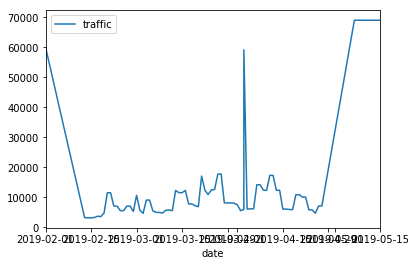

In [177]:
webtraffic.plot('date', 'traffic');

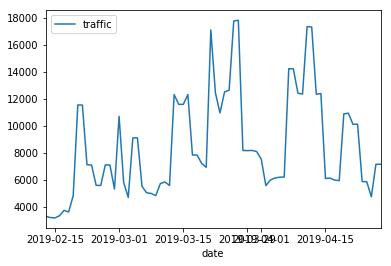

In [179]:
# Delete the outliers - strange numbers
webtraffic = webtraffic[webtraffic.traffic < 30000]
webtraffic.plot('date', 'traffic')

In [180]:
webtraffic.head(2), webtraffic.tail(2)

(         date  traffic
 1  2019-02-13     3279
 2  2019-02-14     3180,           date  traffic
 74  2019-04-26     7131
 75  2019-04-27     7135)

In [0]:
webtraffic.rename(columns={'traffic': 'web_traffic'}, inplace=True)

In [182]:
webtraffic.head(2)

,date,web_traffic
1,2019-02-13,3279
2,2019-02-14,3180


## Tweet statistics trends dataset / daily data
- start date 2019-04-04
- end date 2019-05-21

In [183]:
tw_stat.head(2)

,id,likes,retweet,count_comments,followers,count_tweets,date,company_id,id.1,name,ticker,domain,date_updated,twitter_url
0,4,94910,12543,7518,1031394,847,2019-04-04 10:52:37.477168+00,1,1,ASOS PLC,ASOS.L,asosplc.com,2019-05-15 04:06:01.389601+00,https://twitter.com/ASOS
1,10,94979,12547,7542,1031416,848,2019-04-05 07:46:00.0232+00,1,1,ASOS PLC,ASOS.L,asosplc.com,2019-05-15 04:06:01.389601+00,https://twitter.com/ASOS


In [184]:
tw_stat.tail(2)

,id,likes,retweet,count_comments,followers,count_tweets,date,company_id,id.1,name,ticker,domain,date_updated,twitter_url
46,680,100991,12697,8992,1032822,847,2019-05-20 07:00:00.128077+00,1,1,ASOS PLC,ASOS.L,asosplc.com,2019-05-15 04:06:01.389601+00,https://twitter.com/ASOS
47,702,93719,11349,8685,1033062,788,2019-05-21 07:00:00.115425+00,1,1,ASOS PLC,ASOS.L,asosplc.com,2019-05-15 04:06:01.389601+00,https://twitter.com/ASOS


In [185]:
tw_stat = tw_stat[['likes',	'retweet',	'count_comments',	'followers',	'count_tweets',	'date']]
tw_stat['date'] = pd.to_datetime(tw_stat['date']).dt.date
tw_stat.head()

,likes,retweet,count_comments,followers,count_tweets,date
0,94910,12543,7518,1031394,847,2019-04-04
1,94979,12547,7542,1031416,848,2019-04-05
2,91579,11746,7384,1031489,796,2019-04-06
3,91681,11743,7452,1031466,796,2019-04-07
4,91761,11735,7975,1031455,796,2019-04-08


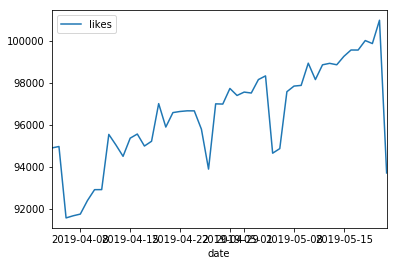

In [186]:
tw_stat.plot('date', 'likes')

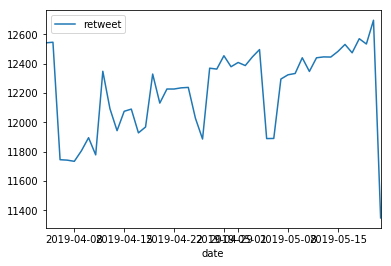

In [187]:
tw_stat.plot('date', 'retweet')

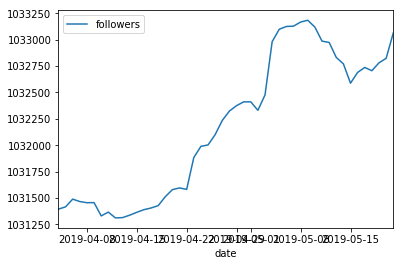

In [188]:
tw_stat.plot('date', 'followers')

## Tweet dataset / daily data
- start date 2017-07-18
- end date 2019-05-20

In [189]:
tweets.head(2)

,id,tweet_id,text,likes,retweet,count_comments,date,date_update,company_id,id.1,name,ticker,domain,date_updated,twitter_url
0,846,887362341884624896,Meet our all-girl creative collective and ente...,34,11,0,2017-07-18 10:24:00+00,2019-04-05 07:46:00.0232+00,1,1,ASOS PLC,ASOS.L,asosplc.com,2019-05-15 04:06:01.389601+00,https://twitter.com/ASOS
1,845,887582794649567233,Get something to brighten your wardrobe in the...,21,4,1,2017-07-19 01:00:00+00,2019-04-05 07:46:00.0232+00,1,1,ASOS PLC,ASOS.L,asosplc.com,2019-05-15 04:06:01.389601+00,https://twitter.com/ASOS


In [190]:
tweets.tail(2)

,id,tweet_id,text,likes,retweet,count_comments,date,date_update,company_id,id.1,name,ticker,domain,date_updated,twitter_url
950,18995,1130418597069766656,'Selling fast' huh? You guys have got some exp...,209,12,6,2019-05-20 03:22:00+00,2019-05-21 07:00:00.115425+00,1,1,ASOS PLC,ASOS.L,asosplc.com,2019-05-15 04:06:01.389601+00,https://twitter.com/ASOS
951,18994,1130451691311128586,The #IGOR starter pack pic.twitter.com/OkH6AHk4ND,49,2,3,2019-05-20 05:34:00+00,2019-05-21 07:00:00.115425+00,1,1,ASOS PLC,ASOS.L,asosplc.com,2019-05-15 04:06:01.389601+00,https://twitter.com/ASOS


In [191]:
tweets = tweets[['tweet_id',	'likes',	'retweet',	'count_comments',	'date']]
tweets['date'] = pd.to_datetime(tweets['date']).dt.date
tweets.head()

,tweet_id,likes,retweet,count_comments,date
0,887362341884624896,34,11,0,2017-07-18
1,887582794649567233,21,4,1,2017-07-19
2,887756940855607296,12,2,0,2017-07-19
3,888350602073436161,42,9,3,2017-07-21
4,888384968430415872,104,8,2,2017-07-21


In [192]:
# Count num likes, num retweets, num comments per day
tt = tweets[['likes',	'retweet',	'count_comments']].groupby(tweets.date).sum()
tt

,likes,retweet,count_comments
date,,,
2017-07-18,34,11,0
2017-07-19,33,6,1
2017-07-21,146,17,5
2017-07-22,100,14,3
2017-07-24,241,41,9
2017-07-25,111,28,12
2017-07-26,78,16,2
2017-07-31,35,7,0
2017-08-01,41,10,3


In [193]:
# Count the numbers of tweet per day
ttt = tweets[['tweet_id']].groupby(tweets.date).count()
ttt

,tweet_id
date,
2017-07-18,1
2017-07-19,2
2017-07-21,2
2017-07-22,2
2017-07-24,4
2017-07-25,3
2017-07-26,1
2017-07-31,1
2017-08-01,1


In [194]:
tweets = ttt.merge(tt, left_index=True, right_index=True)
tweets.head(5)

,tweet_id,likes,retweet,count_comments
date,,,,
2017-07-18,1,34,11,0
2017-07-19,2,33,6,1
2017-07-21,2,146,17,5
2017-07-22,2,100,14,3
2017-07-24,4,241,41,9


In [0]:
tweets.rename(columns={'tweet_id': 'twts_p_day', 'likes':'likes_p_day', 
                       'retweets_p_day':'retwts_p_day', 'count_comments':'comments_p_day'}, inplace=True)

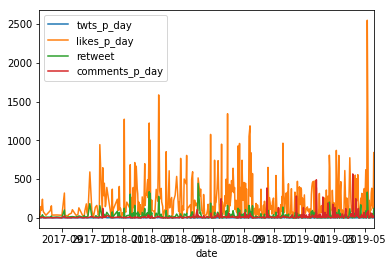

In [196]:
tweets.plot()

## Yahoo finance dataset / daily data
- start date 2016-05-23
- end date 2019-05-21

In [197]:
yahfin.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-05-23,3483.0,3548.0,3472.0,3491.0,3491.0,532884
1,2016-05-24,3477.0,3628.0,3450.0,3623.0,3623.0,408667


In [198]:
yahfin.tail(2)

,Date,Open,High,Low,Close,Adj Close,Volume
756,2019-05-20,3650.0,3650.0,3523.0,3527.0,3527.0,275542
757,2019-05-21,3538.0,3584.0,3510.0,3535.0,3535.0,288389


In [199]:
yahfin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 7 columns):
Date         758 non-null object
Open         758 non-null float64
High         758 non-null float64
Low          758 non-null float64
Close        758 non-null float64
Adj Close    758 non-null float64
Volume       758 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 41.5+ KB


In [0]:
yahfin['date'] = pd.to_datetime(yahfin['Date']).dt.date

#### Consensus dataset / daily data
- start date -----------------------------------------------------------2019-03-01 - end date 2019-05-22

#### Google trends dataset / monthly data

*  start date 2004-01-01 ------------------------------------------------------- *  end date 2019-05-22

#### Webtraffic dataset / daily data
- start date -----------------------------------------2019-02-13 ----------- end date 2019-04-27--------

#### Tweet statistics trends dataset / daily data
- start date -----------------------------------------------------------2019-04-04 - end date 2019-05-21

#### Tweet dataset / daily data
- start date ---------------------2017-07-18 --------------------------------------- end date 2019-05-20

#### Yahoo finance dataset / daily data
- start date ------------2016-05-23 ------------------------------------------------ end date 2019-05-21

In [0]:
tweets['date'] = tweets.index.values
df_outer = yahfin.merge(tweets, left_on='date', right_index=True, how='outer')
df_outer = df_outer.drop(['Date', 'date_x', 'Adj Close'], axis=1)

In [202]:
df_outer.head()

,date,Open,High,Low,Close,Volume,twts_p_day,likes_p_day,retweet,comments_p_day,date_y
0,2016-05-23,3483.0,3548.0,3472.000000,3491.0,532884.0,NaN,NaN,NaN,NaN,NaN
1,2016-05-24,3477.0,3628.0,3450.000000,3623.0,408667.0,NaN,NaN,NaN,NaN,NaN
2,2016-05-25,3646.0,3653.0,3546.750000,3571.0,597278.0,NaN,NaN,NaN,NaN,NaN
3,2016-05-26,3577.0,3655.0,3485.000000,3485.0,2610664.0,NaN,NaN,NaN,NaN,NaN
4,2016-05-27,3484.0,3538.0,3450.030029,3507.0,532752.0,NaN,NaN,NaN,NaN,NaN


In [0]:
df_outer = df_outer.merge(tw_stat, on='date', how='outer')


In [0]:
df_outer = df_outer.merge(webtraffic, on='date', how='outer')

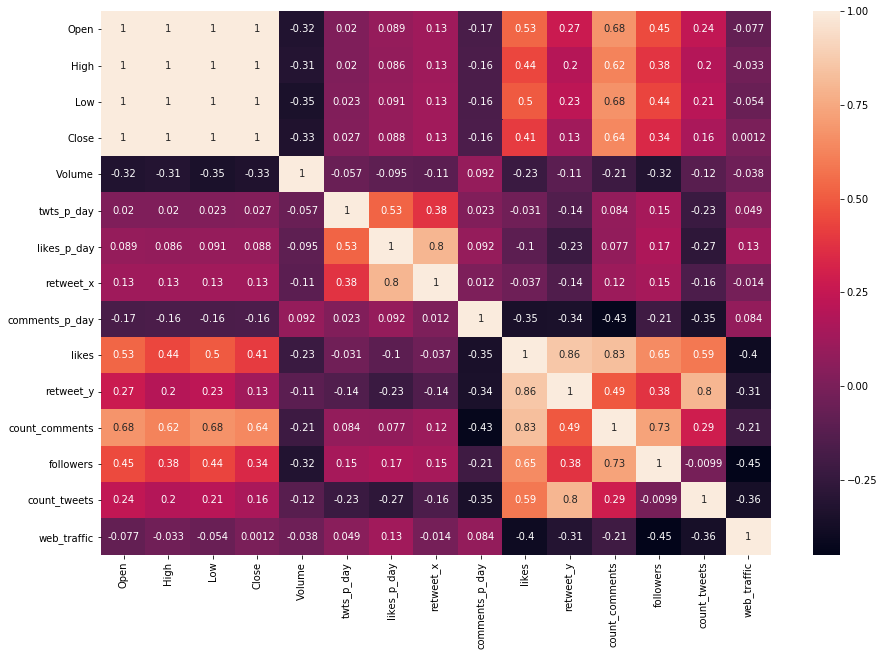

In [205]:
plt.subplots(figsize=(15,10))
sns.heatmap(df_outer.corr(), annot=True)

In [206]:
df_outer.head()

,date,Open,High,Low,Close,Volume,twts_p_day,likes_p_day,retweet_x,comments_p_day,date_y,likes,retweet_y,count_comments,followers,count_tweets,web_traffic
0,2016-05-23,3483.0,3548.0,3472.000000,3491.0,532884.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-05-24,3477.0,3628.0,3450.000000,3623.0,408667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-05-25,3646.0,3653.0,3546.750000,3571.0,597278.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-05-26,3577.0,3655.0,3485.000000,3485.0,2610664.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-05-27,3484.0,3538.0,3450.030029,3507.0,532752.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
df_outer.shape

(869, 17)

In [0]:
# Delete the column 'date_y'
# Rename the column 'retweet_x' in 'retwt_p_day'
df_outer = df_outer.drop('date_y', axis=1).rename(columns={'retweet_x':'retwt_p_day'})

In [209]:
df_outer.head()

,date,Open,High,Low,Close,Volume,twts_p_day,likes_p_day,retwt_p_day,comments_p_day,likes,retweet_y,count_comments,followers,count_tweets,web_traffic
0,2016-05-23,3483.0,3548.0,3472.000000,3491.0,532884.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-05-24,3477.0,3628.0,3450.000000,3623.0,408667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-05-25,3646.0,3653.0,3546.750000,3571.0,597278.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-05-26,3577.0,3655.0,3485.000000,3485.0,2610664.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-05-27,3484.0,3538.0,3450.030029,3507.0,532752.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [210]:
df_outer.shape

(869, 16)

In [211]:
# DataFrame that contains majority of information, but is very short have only a few days
startdate = pd.to_datetime('2019-04-04').date()
enddate = pd.to_datetime('2019-04-27').date()

df_limited = df_outer[(df_outer['date'] >= startdate) & (df_outer['date'] <=enddate)]
df_limited.shape,
df_limited.head()

,date,Open,High,Low,Close,Volume,twts_p_day,likes_p_day,retwt_p_day,comments_p_day,likes,retweet_y,count_comments,followers,count_tweets,web_traffic
727,2019-04-04,3335.0,3335.0,3134.0,3134.0,511139.0,3.0,112.0,13.0,54.0,94910.0,12543.0,7518.0,1031394.0,847.0,6115.0
728,2019-04-05,3175.0,3260.0,3151.0,3153.0,455556.0,2.0,84.0,5.0,15.0,94979.0,12547.0,7542.0,1031416.0,848.0,6173.0
729,2019-04-08,3139.0,3142.0,3043.0,3090.0,545236.0,6.0,528.0,47.0,18.0,91761.0,11735.0,7975.0,1031455.0,796.0,14208.0
730,2019-04-09,3093.0,3150.0,3064.0,3150.0,570968.0,2.0,462.0,56.0,16.0,92405.0,11807.0,8010.0,1031456.0,805.0,12398.0
731,2019-04-10,3090.0,3673.0,3039.0,3397.0,1310031.0,2.0,51.0,3.0,13.0,92924.0,11896.0,8030.0,1031330.0,809.0,12340.0


In [212]:
df_limited.shape

(24, 16)

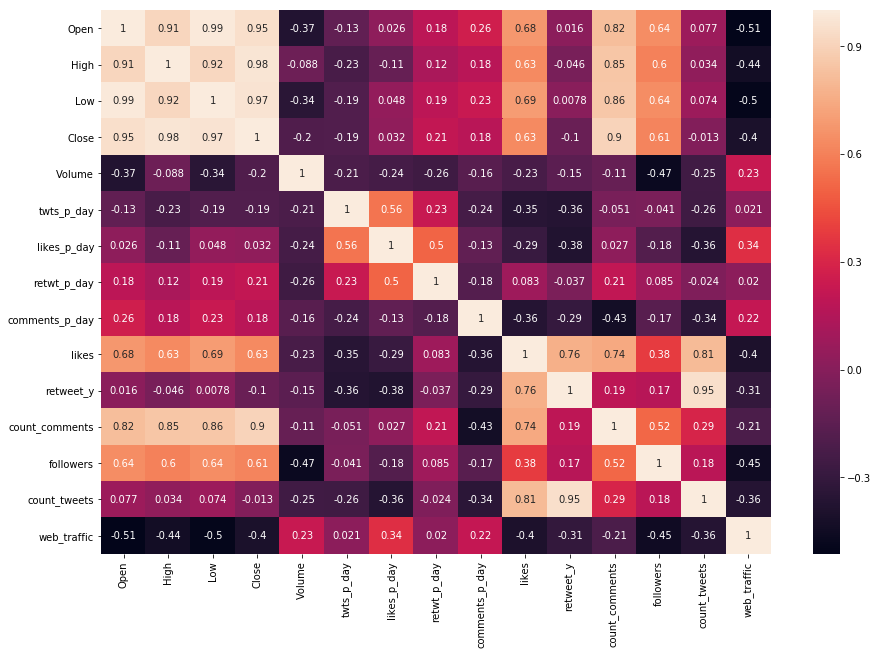

In [213]:
plt.subplots(figsize=(15,10))
sns.heatmap(df_limited.corr(), annot=True)

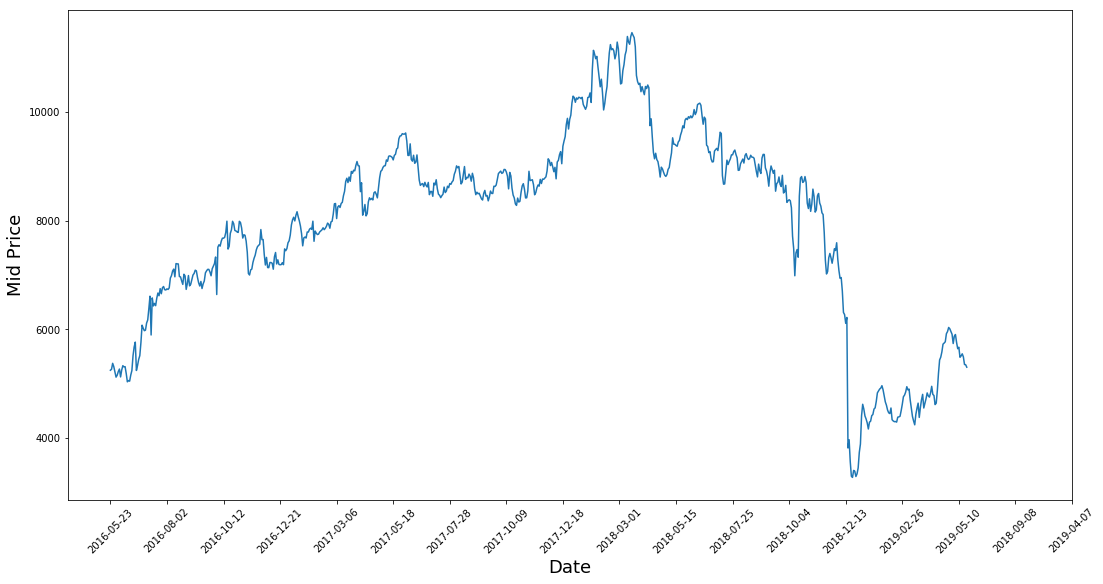

In [214]:
plt.figure(figsize = (18, 9))
plt.plot(range(df_outer.shape[0]), (df_outer['Low']+ df_outer['High'] /2.0))
#plt.plot(range(df.shape[]))
plt.xticks(range(0, df_outer.shape[0], 50), df_outer['date'].loc[::50], rotation = 45)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Mid Price', fontsize = 18)
plt.show()

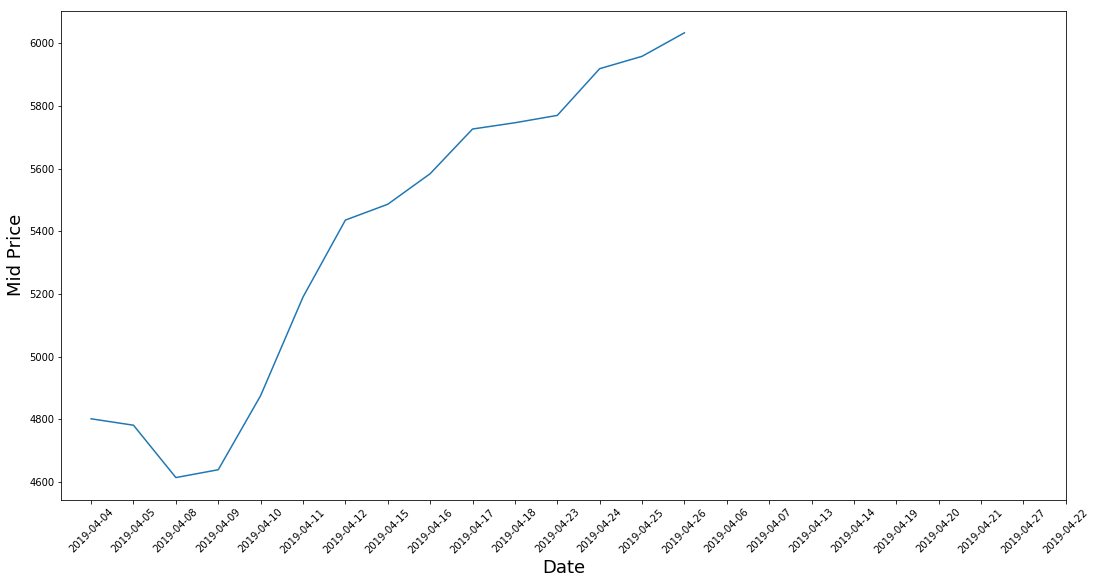

In [215]:
plt.figure(figsize = (18, 9))
plt.plot(range(df_limited.shape[0]), (df_limited['Low']+ df_limited['High'] /2.0))
plt.xticks(range(0, df_limited.shape[0], 1), df_limited['date'].loc[::1], rotation = 45)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Mid Price', fontsize = 18)
plt.show()

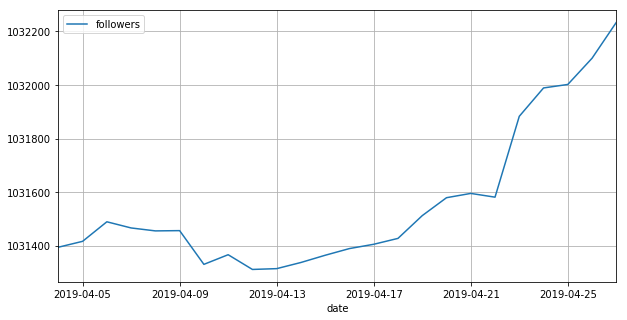

In [216]:
df_limited.plot(x='date', y=['followers'], figsize=(10,5), grid=True)

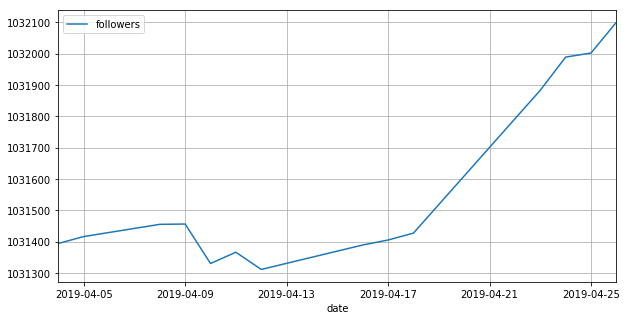

In [217]:
df_outer.dropna().plot(x='date', y=['followers'], figsize=(10,5), grid=True)

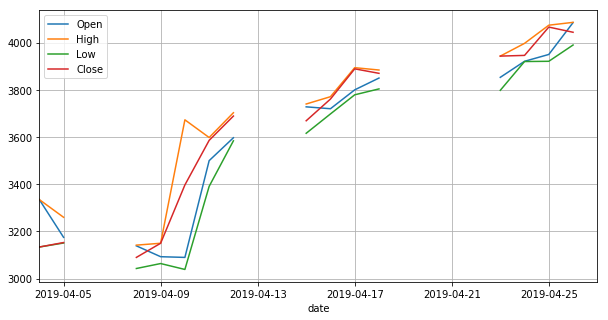

In [218]:
df_limited.plot(x='date', y=['Open',	'High',	'Low',	'Close'], figsize=(10,5), grid=True)

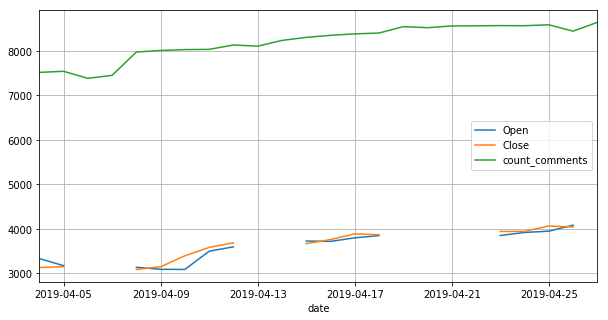

In [219]:
df_limited.plot(x='date', y=['Open',	'Close', 'count_comments'], figsize=(10,5), grid=True);

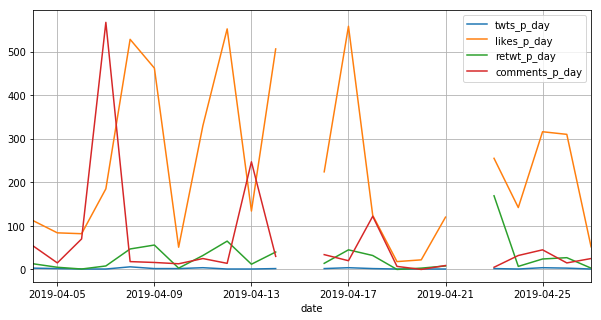

In [220]:
df_limited.plot(x='date', y=['twts_p_day',	'likes_p_day',	'retwt_p_day',	'comments_p_day'], figsize=(10,5), grid=True);

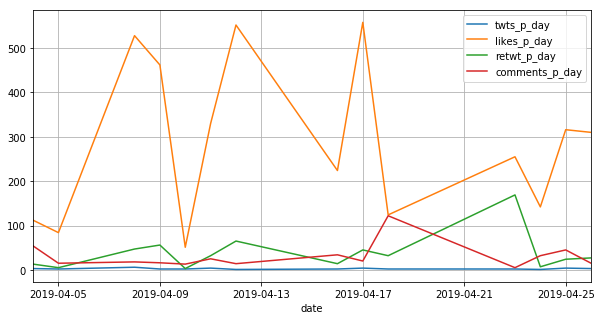

In [221]:
df_outer.dropna().plot(x='date', y=['twts_p_day',	'likes_p_day',	'retwt_p_day',	'comments_p_day'], figsize=(10,5), grid=True);

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


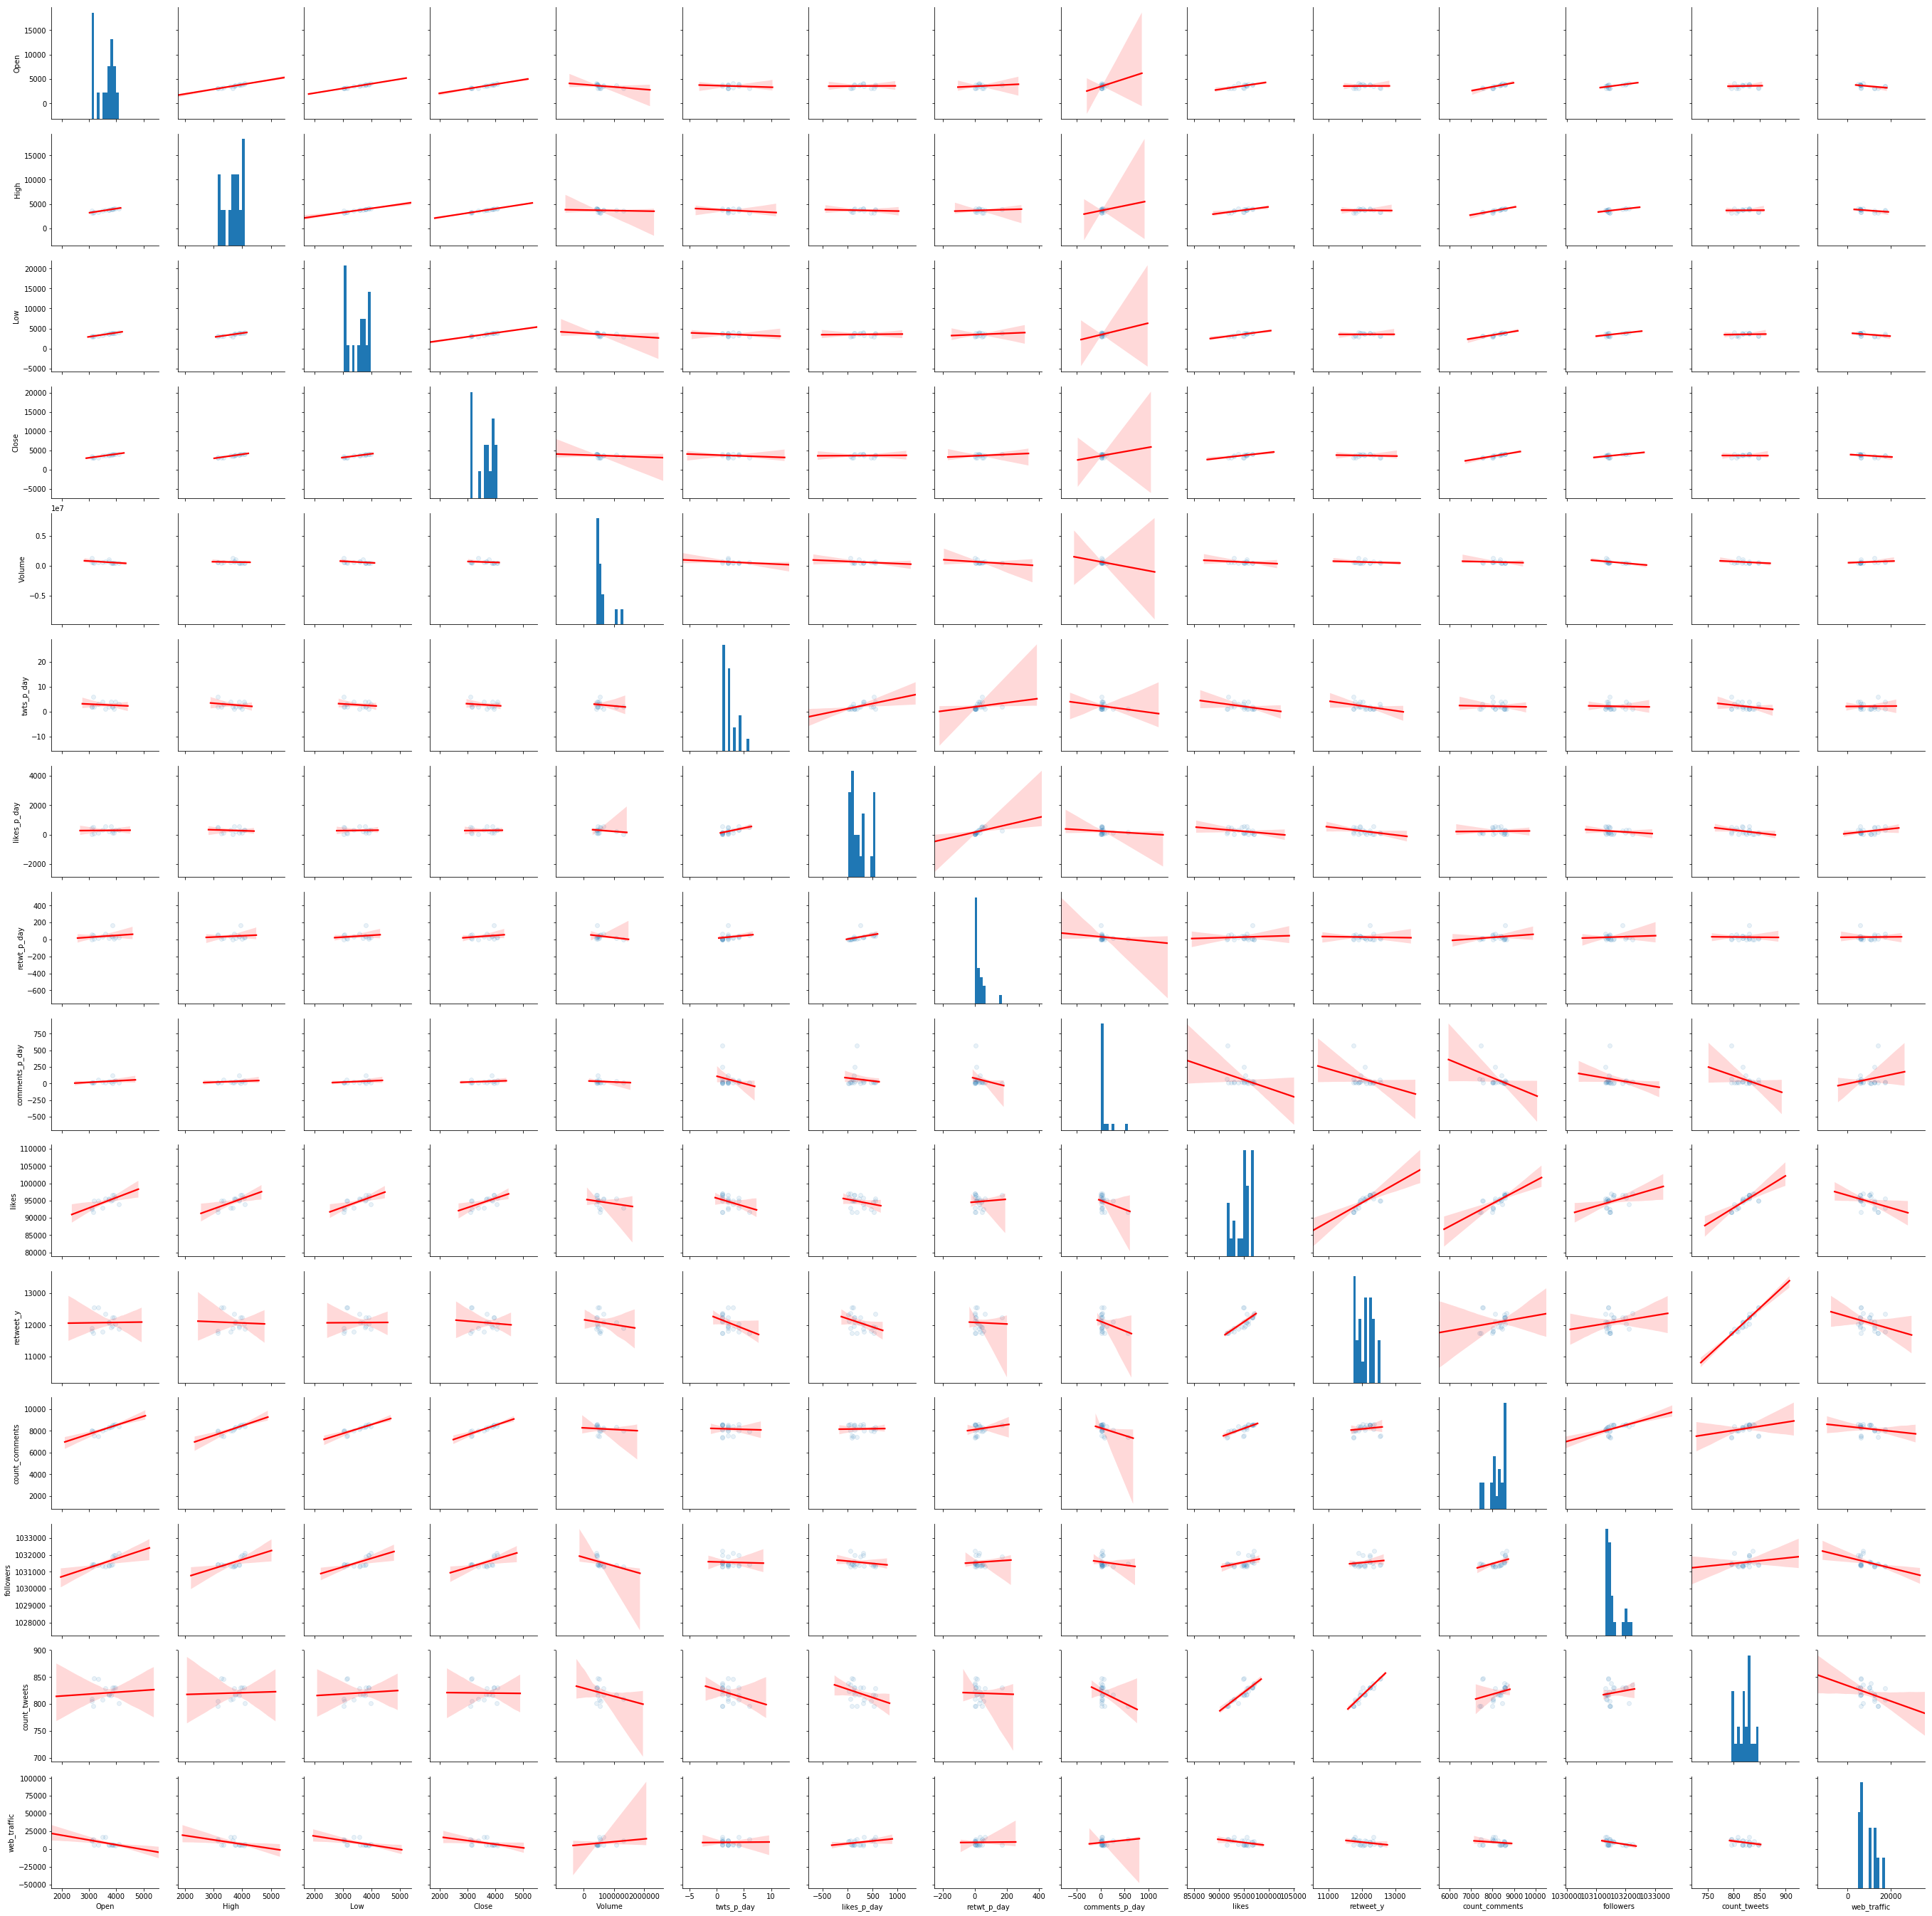

In [222]:
sns.pairplot(df_limited, kind='reg', plot_kws={'line_kws':{'color': 'r'}, 'scatter_kws':{'alpha': .1}})

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


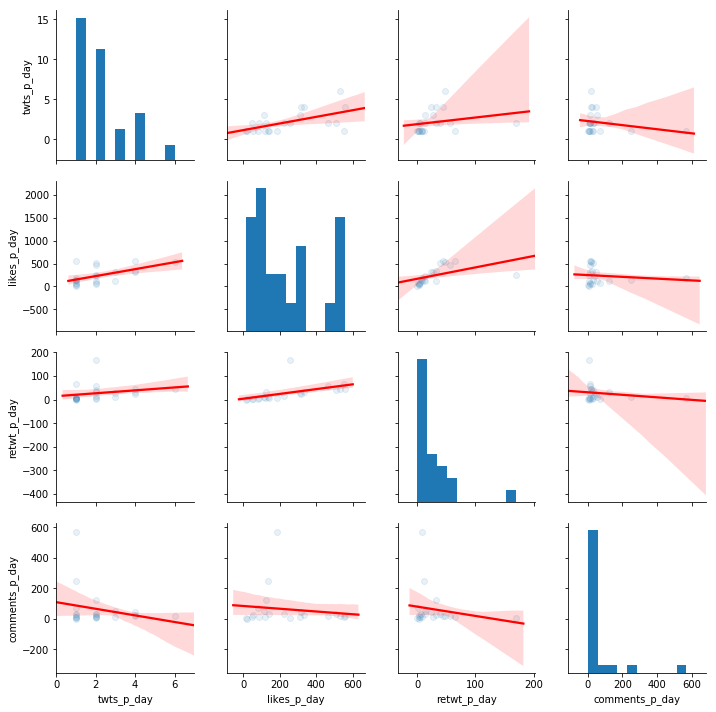

In [224]:
sns.pairplot(df_limited[['twts_p_day',	'likes_p_day',	'retwt_p_day',	'comments_p_day']], kind='reg', plot_kws={'line_kws':{'color': 'r'}, 'scatter_kws':{'alpha': .1}})

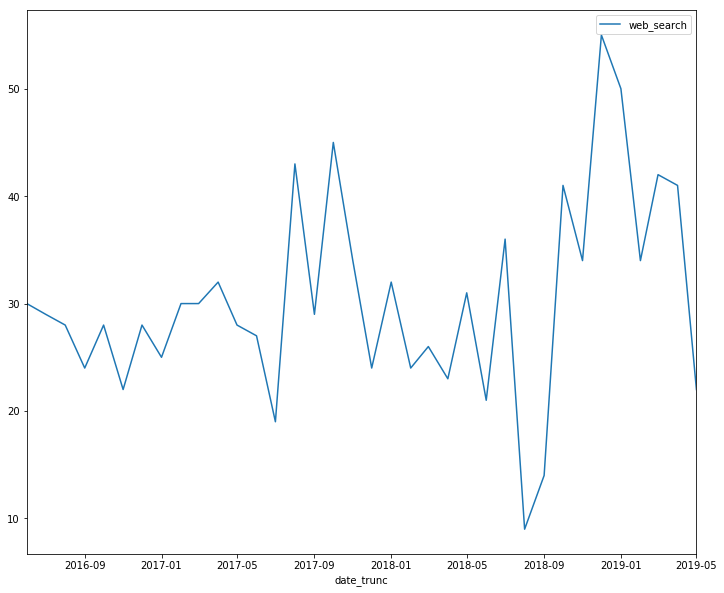

In [226]:
# cut year that are not relevant for us: 2004 - 2016-05
goog_trends = goog_trends[goog_trends['date_trunc'] >= pd.to_datetime('2016-05-23').date()]
goog_trends.plot('date_trunc', 'web_search', figsize=(12, 10))


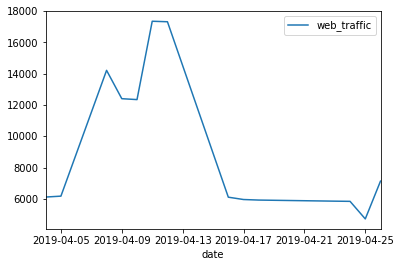

In [227]:
# plt.plot(df_outer[df_outer['date'] >= pd.to_datetime('2016-05-23').date()], df_outer['web_traffic'])
df_outer.dropna().plot('date', 'web_traffic')